In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scikitplot.plotters import plot_precision_recall_curve

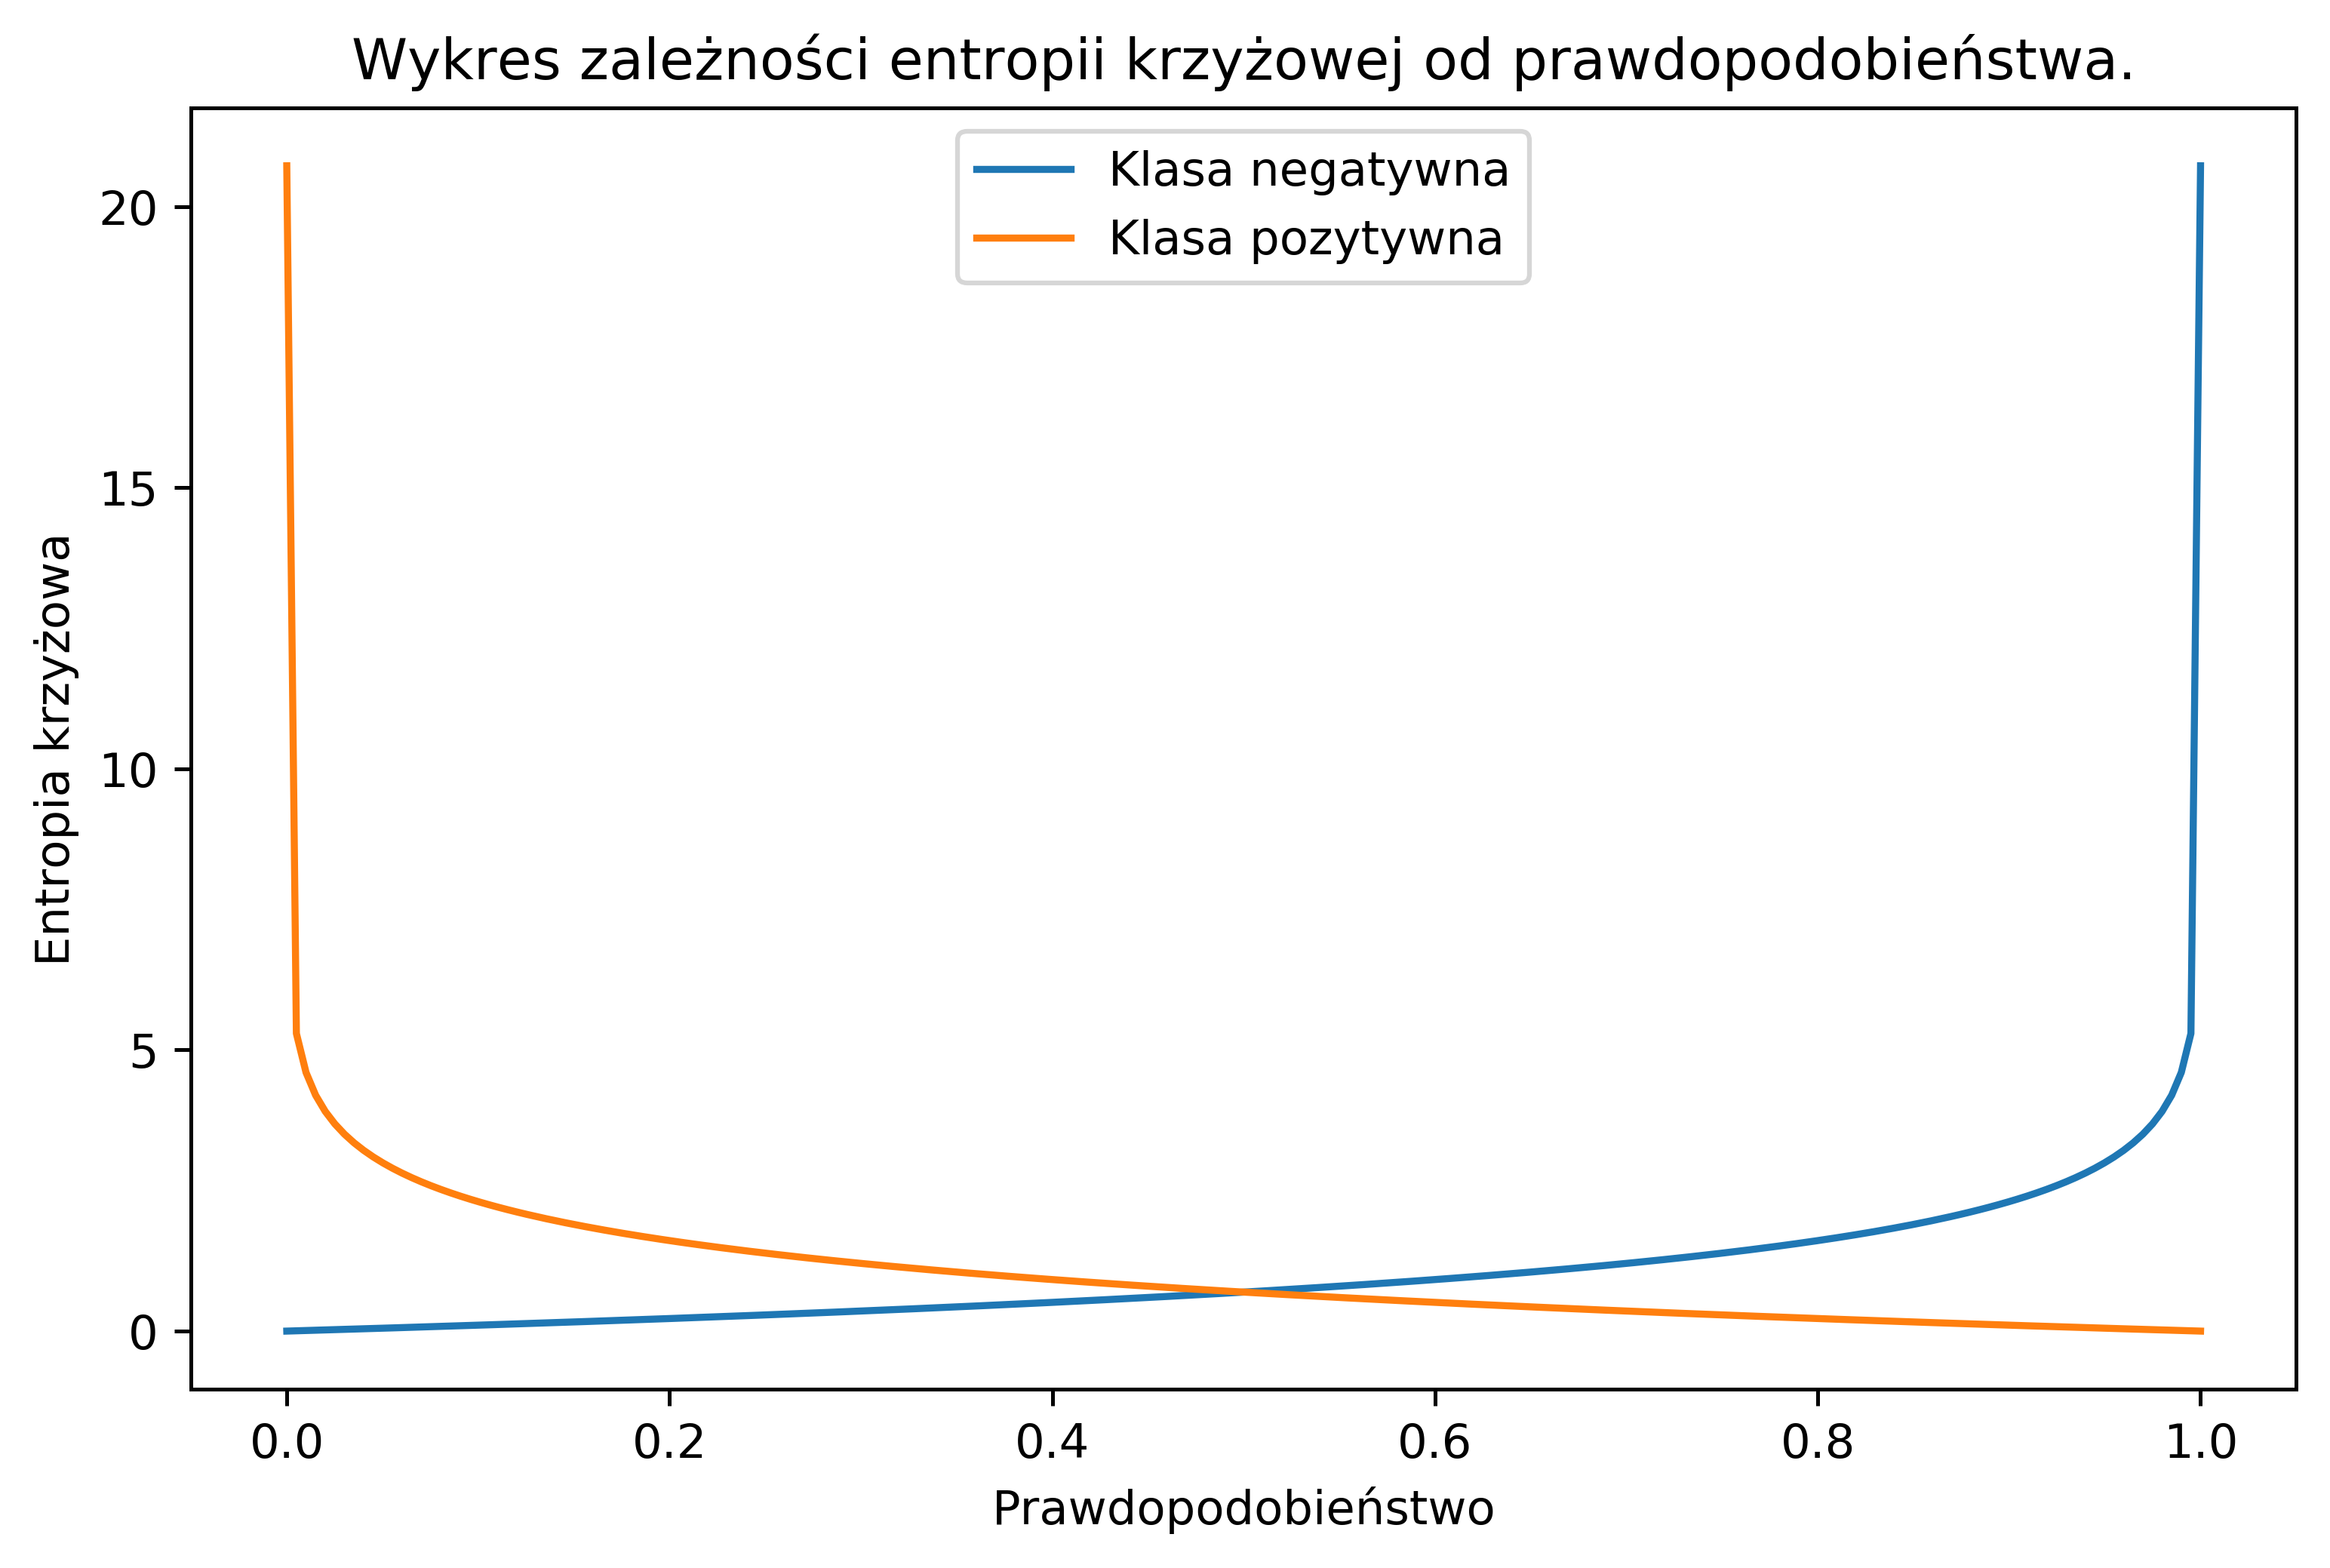

In [30]:
def cross_entropy(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)

    
eps = 1e-9

p = np.linspace(0+eps, 1-eps, 200)
log_loss_0 = [cross_entropy(pred, 0) for pred in p]
log_loss_1 = [cross_entropy(pred, 1) for pred in p]

plt.figure(figsize = (8, 5), dpi = 450)

plt.plot(p, log_loss_0, label = 'Klasa negatywna')
plt.plot(p, log_loss_1, label = 'Klasa pozytywna')

plt.title('Wykres zależności entropii krzyżowej od prawdopodobieństwa.')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Entropia krzyżowa')
plt.legend()

plt.savefig('outputs/201_additional_plots/cross_entropy.png')

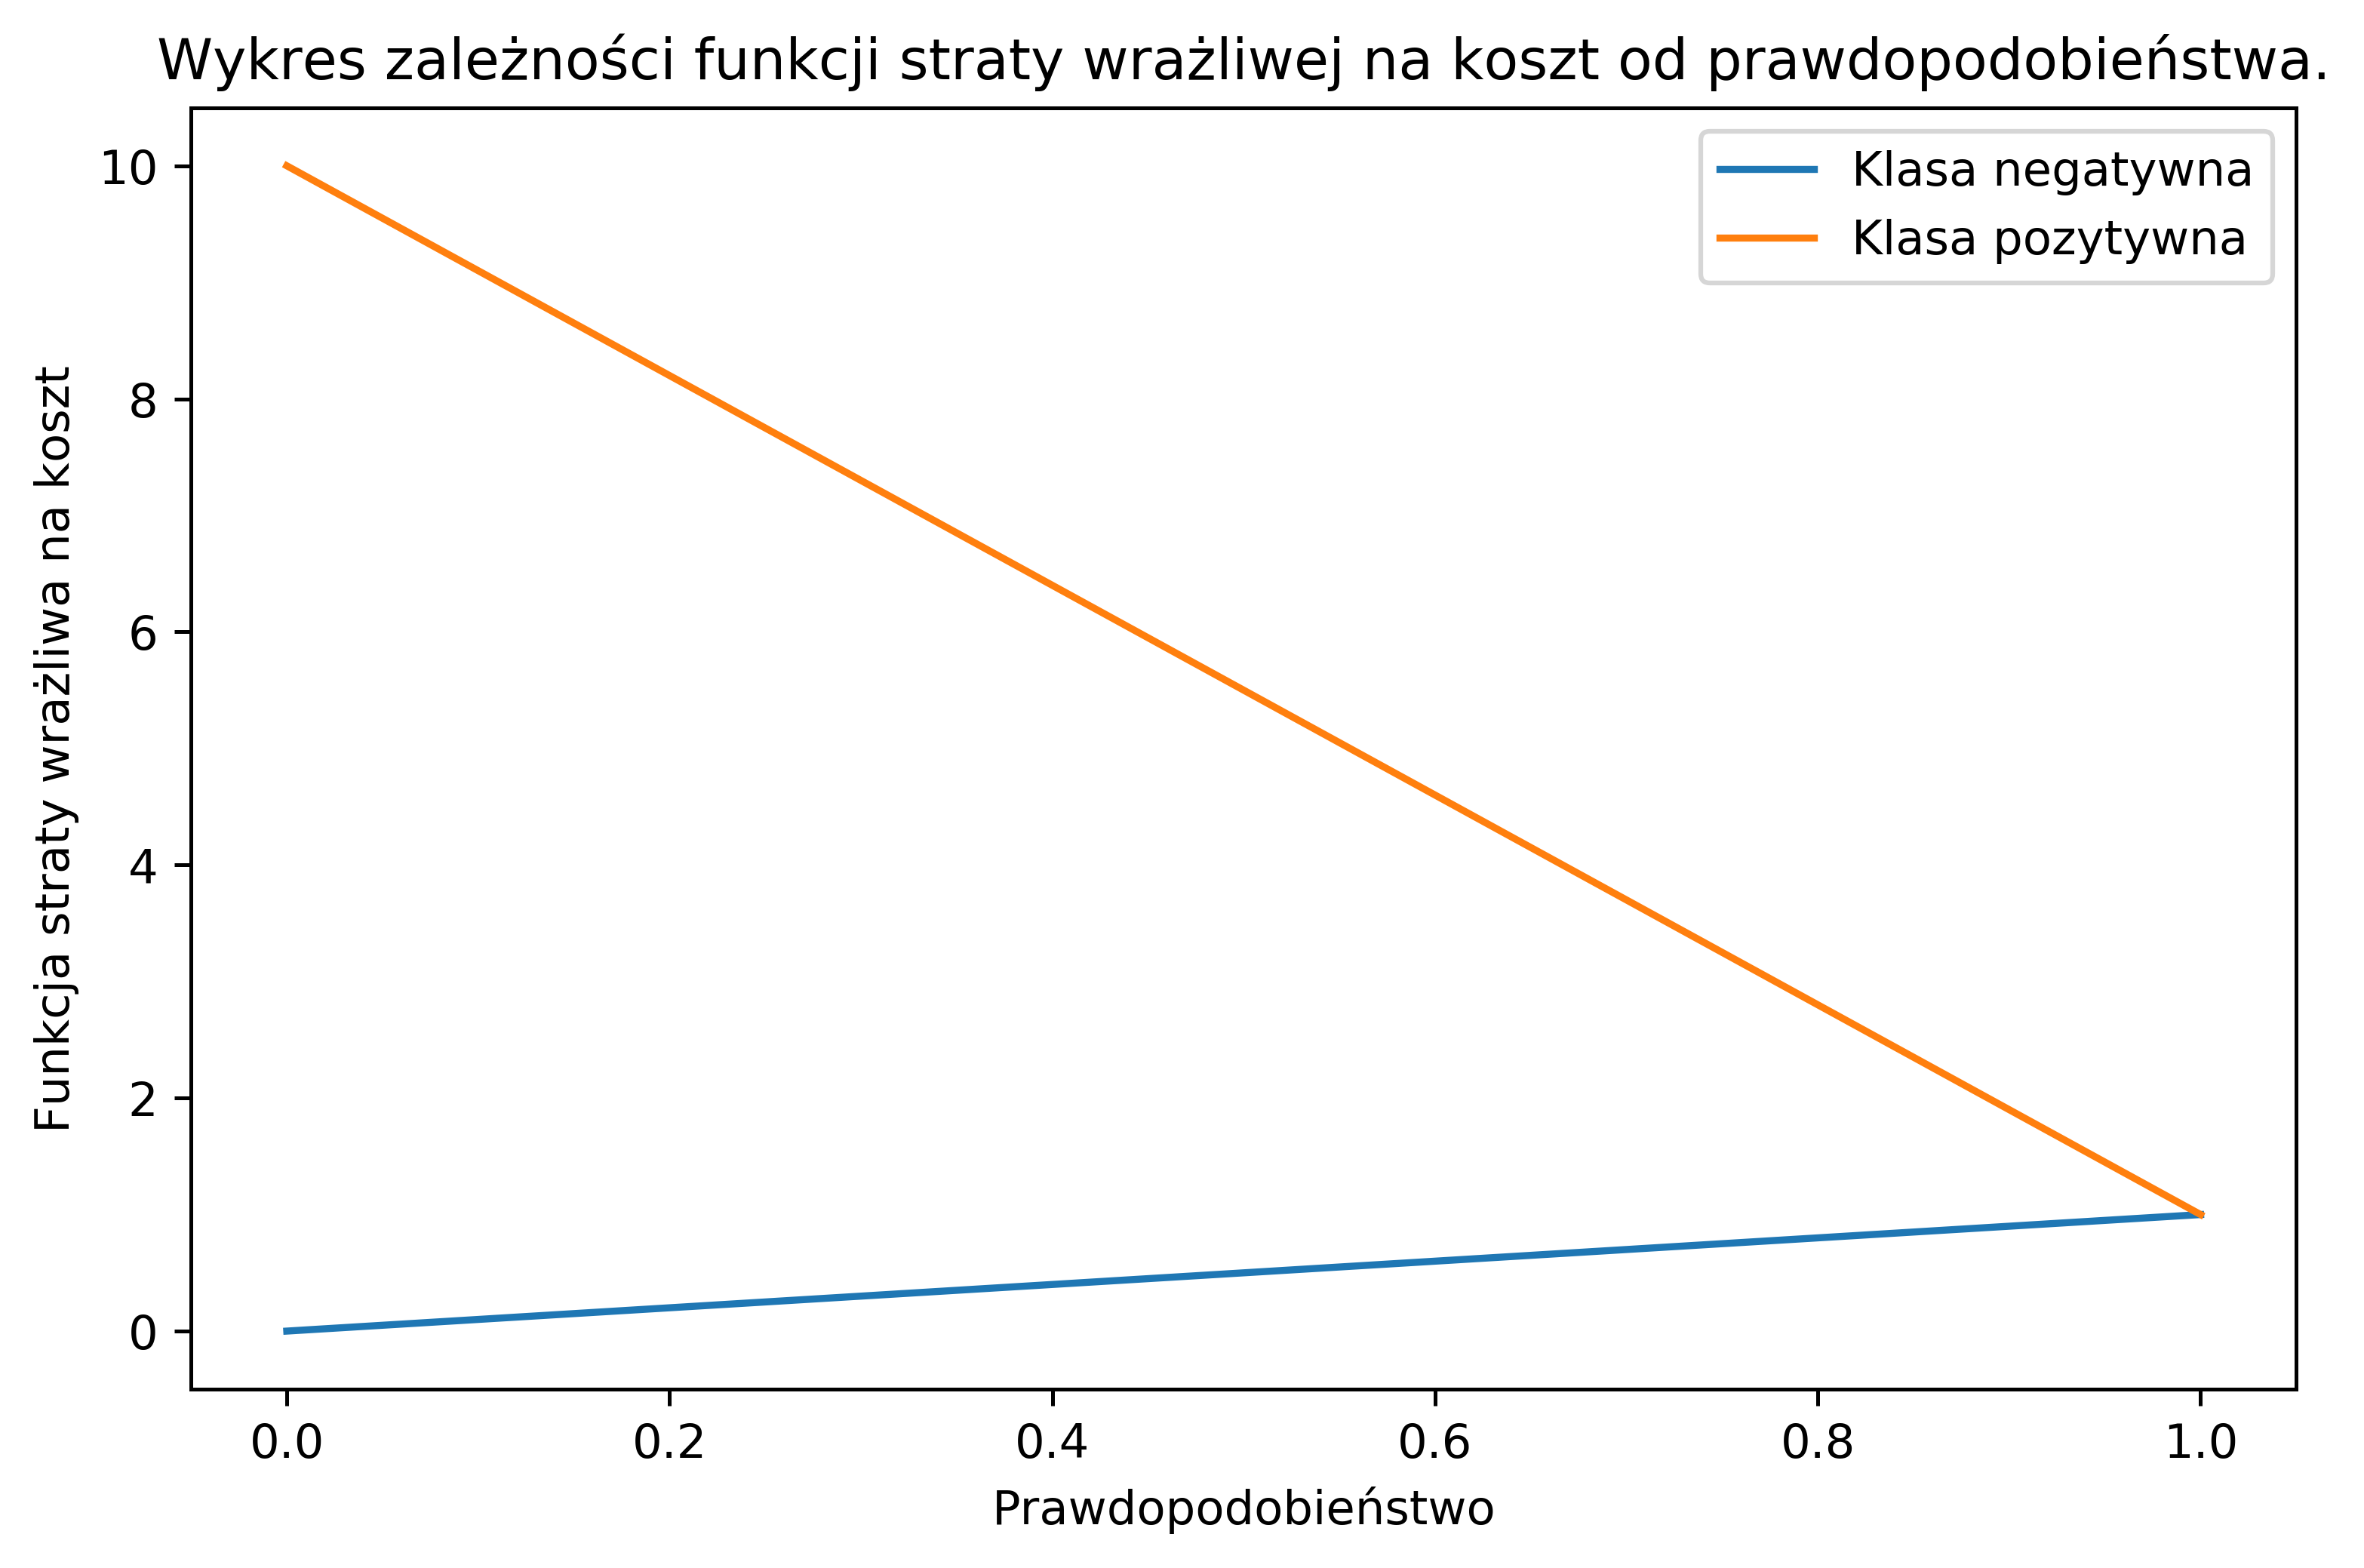

In [31]:
def cost_sensitive_ce(y_hat, y, fp, fn, tp, tn):
    # false positives, false negatives, true positives, true negatives
    if y == 1:
        return tp*y_hat + (1-y_hat)*fn
    else:
        return fp*y_hat + (1-y_hat)*tn

    
eps = 1e-9
fp = 1
fn = 10
tp = 1
tn = 0

p = np.linspace(0+eps, 1-eps, 200)
log_loss_0 = [cost_sensitive_ce(pred, 0, fp, fn, tp, tn) for pred in p]
log_loss_1 = [cost_sensitive_ce(pred, 1, fp, fn, tp, tn) for pred in p]

plt.figure(figsize = (8, 5), dpi = 450)

plt.plot(p, log_loss_0, label = 'Klasa negatywna')
plt.plot(p, log_loss_1, label = 'Klasa pozytywna')

plt.title('Wykres zależności funkcji straty wrażliwej na koszt od prawdopodobieństwa.')
plt.xlabel('Prawdopodobieństwo')
plt.ylabel('Funkcja straty wrażliwa na koszt')
plt.legend()

plt.savefig('outputs/201_additional_plots/cost_sensitive_ce.png')
plt.show()

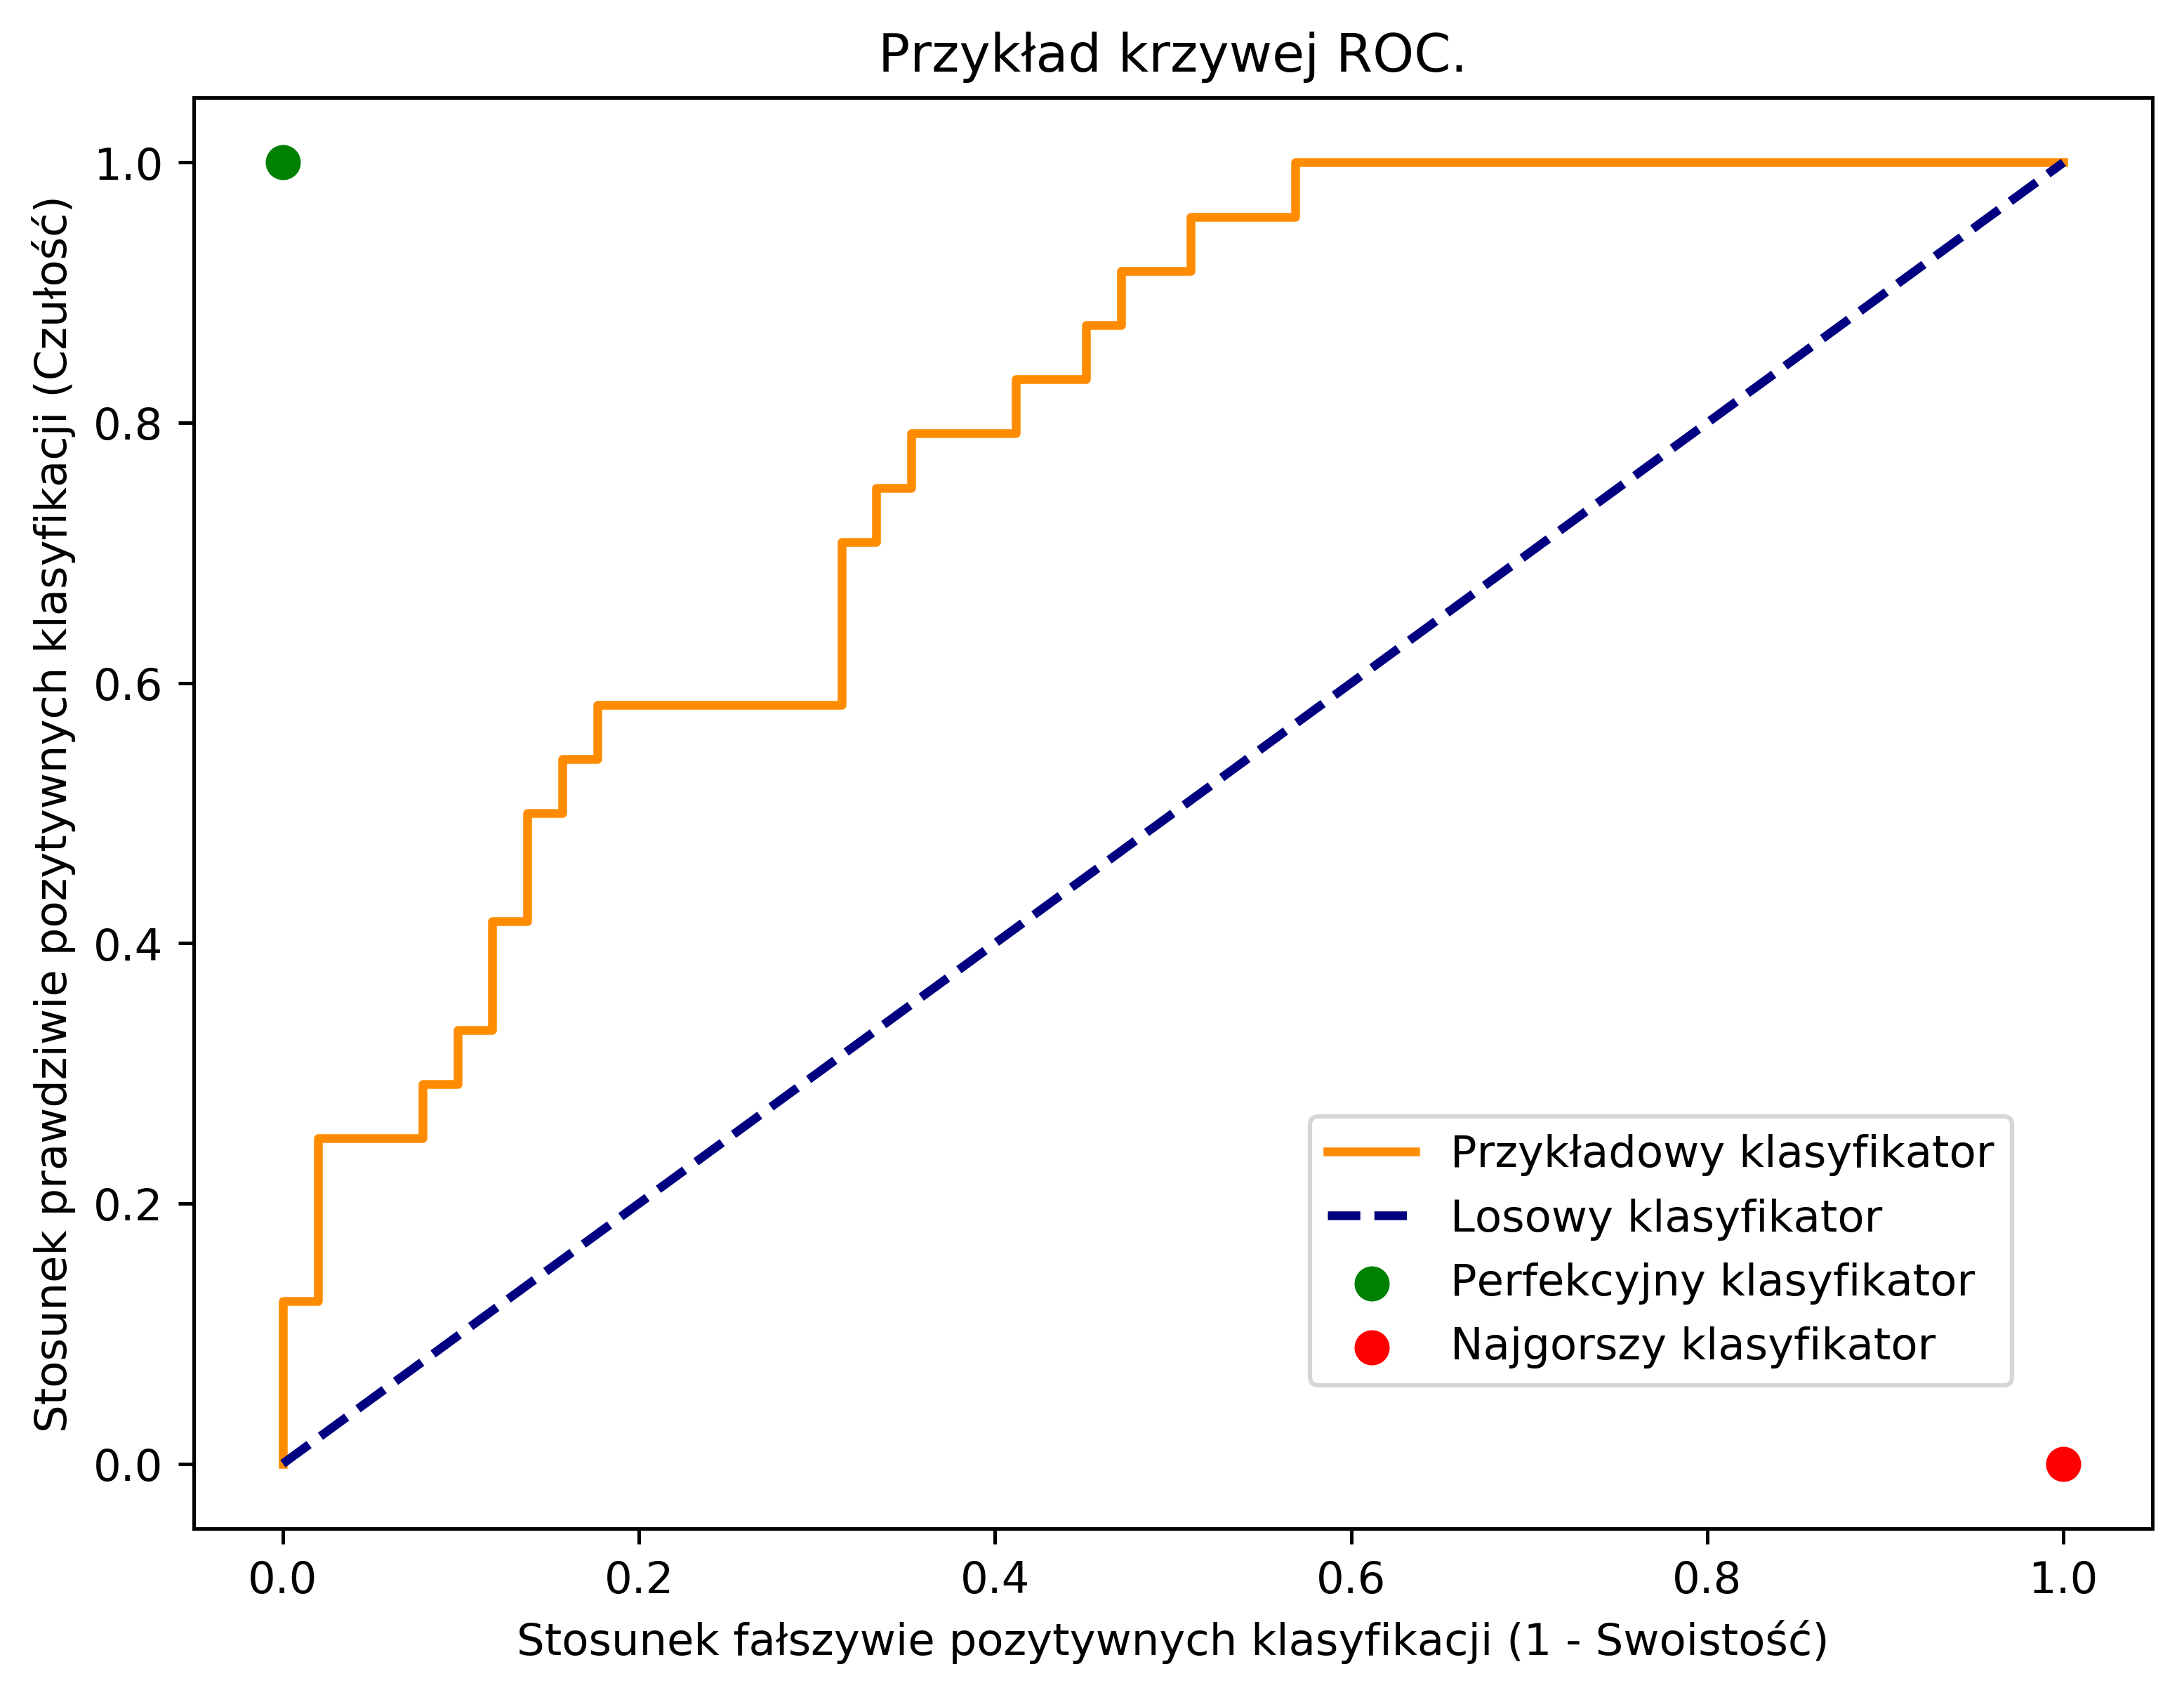

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


##############################################################################
# Plot of a ROC curve for a specific class
plt.figure(figsize = (8, 6), dpi = 450)
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='Przykładowy klasyfikator' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label = 'Losowy klasyfikator')
plt.scatter([0], [1], color='green', lw=lw, label = 'Perfekcyjny klasyfikator')
plt.scatter([1], [0], color='red', lw=lw, label = 'Najgorszy klasyfikator')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Stosunek fałszywie pozytywnych klasyfikacji (1 - Swoistość)')
plt.ylabel('Stosunek prawdziwie pozytywnych klasyfikacji (Czułość)')
plt.title('Przykład krzywej ROC.')
plt.legend(loc=(0.57, 0.1))

plt.savefig('outputs/201_additional_plots/roc_example.png')
plt.show()